In [1]:
%matplotlib inline

import numpy as np
import cv2
from matplotlib import pyplot as plt

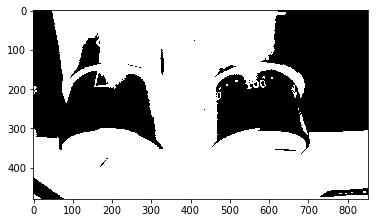

In [62]:
img = cv2.imread('HOG/test/test.jpg') #20171118_130335.jpg'
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

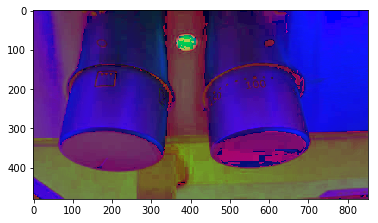

In [55]:
# convert original to HSV 
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv, cmap="hsv")

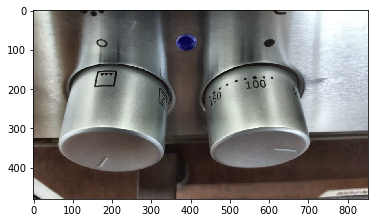

In [66]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization), create a CLAHE object (Arguments are optional)
# convert each of the the level from ---RGB---

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt.imshow(rgb)

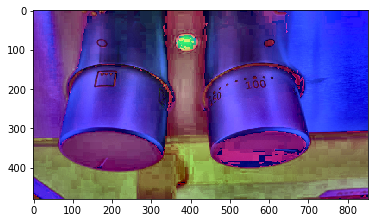

In [67]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization), create a CLAHE object (Arguments are optional)
# convert each of the the level from ---HSV---

lab_hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2LAB)
lab_planes_hsv = cv2.split(lab_hsv)
clahe_hsv = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab_planes_hsv[0] = clahe_hsv.apply(lab_planes_hsv[0])
lab_hsv = cv2.merge(lab_planes_hsv)
hsv_clahe = cv2.cvtColor(lab_hsv, cv2.COLOR_LAB2BGR)

plt.imshow(hsv_clahe)

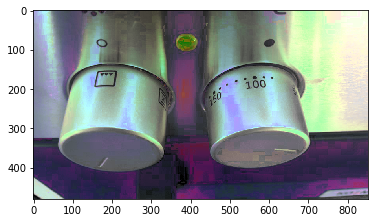

In [72]:
# 'removed' glare, convert HSV image to RGB
rgbimg = cv2.cvtColor(hsv_clahe, cv2.COLOR_HSV2RGB)
plt.imshow(rgbimg)
# create gray image for watershed segementaion
gray_water = cv2.cvtColor(rgbimg, cv2.COLOR_BGR2GRAY)

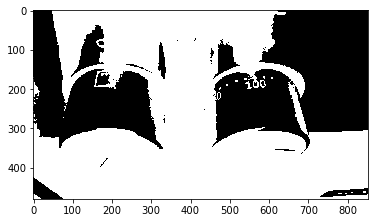

In [74]:
# make new thresholding
ret_w, thresh_w = cv2.threshold(gray_water,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh_w, cmap="gray")

In [76]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh_w,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [77]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [81]:
#markers = cv2.watershed(img,markers)
markers = cv2.watershed(rgbimg, markers)
#img[markers == -1] = [255,0,0]
rgbimg[markers == -1] = [255,0,0]

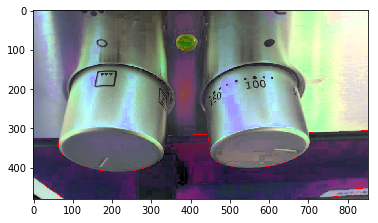

In [82]:
#plt.imshow(img)
plt.imshow(rgbimg)